# Resolvendo o problema de Poisson com condições de contorno de Neumann
$$ u''= f $$
$$ u'(0) = \sigma, \; u(1) = \beta $$
Utilizaremos a aproximação de segunda ordem abaixo para aproximar a solução da equação no intervalo aberto $x  \in (0,1)$:
$$ D^2_h u = \dfrac{U_{i-1} - 2 U_{i} + U_{i+1}}{h^2}$$
Apresentaremos algumas formas de aproximar as condições de contorno de Neumann. 
Ao longo deste trabalho utilizaremos como paramêtros $f = e^x$, $\sigma = 0$ e $\beta = 0$. Resultando no seguinte sistema 
\begin{equation}
\begin{cases}
    u'' &= e^x\\
    u'(0) &= 0 \\
    u(1) &= 0    
\end{cases}
\end{equation}




cuja solução analítica é 

$$    u(x) = -x + e^{x} - e +1 $$

Expressa nas células abaixo:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def solution(x):
    return - x + np.exp(x) - np.exp(1) + 1

## Definimos aqui algumas funções que serão úteis ao longo deste projeto

In [3]:
# Cria uma matriz tridiagonal
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
    
# Interpola a função de forçamento
def interpolateForcing(f, n):
    F = np.zeros(n)
    h = 1.0/(n+1)
    for i in range(0,n):
        F[i] = f(h*(i+1))
    return F

# Resolve e plota o sistema de acordo com o método
def plotSolution(method, n, bc, filename, label):
    # n = 10
    # bc = [2 - np.exp(1),0]
    s = np.linspace(0,1,100)
    plt.plot(s,solution(s),linewidth=2,label="solução analítica")
    t, x, A = method(bc, n, np.exp)
    plt.plot(t,x,"s", label=label,markersize= 5,linewidth=2)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("u(x)",fontsize=12)
    plt.legend()
    plt.grid()
    plt.savefig(filename+".png")
    plt.show()
def convergence(method, boundary_conditions, f, solution, n_points, norm):
    error = np.zeros(n_points)
    errorInvA = np.zeros(n_points)
    h = np.zeros(n_points)
    for i in range(n_points):
        t, x, A = method(boundary_conditions, 2**(i+3) - 1, f)
        sol = solution(t)
        h[i] = 1.0/(2.0**(i+3))
        errorInvA[i] = np.linalg.norm(np.linalg.inv(A), norm)
        error[i] = np.max(np.abs(x - sol))
    return h, error, errorInvA
bc_dirichlet = [2.0 - np.exp(1), 0.0]  
bc_neumann = [0.0,0.0]
n = 10

# Caso com condições de contorno de Dirichlet
Utilizando a expressão para a solução analítica, é possível obter condições de contorno equivalentes às de Neumann na forma de Dirichlet. 
Aplicando estas condições de contorno ao problema discretizado através de diferenças centrais para as derivadas de segunda ordem, obtém-se uma aproximação de segunda ordem $\mathcal{O}(h)$ para o problema.

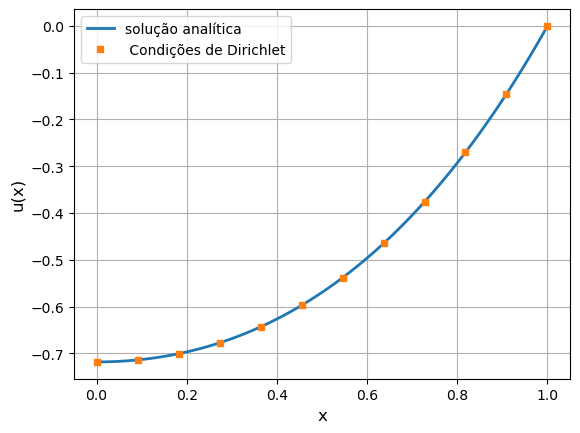

In [4]:
def poissonEqDirichlet(boundary_conditions, n, f):
    h = 1 / (n + 1)
    k1 = np.ones(n - 1); k2 = -2 * np.ones(n); k3 = 1 * np.ones(n - 1)
    A = tridiag(k1, k2, k3)
    F = np.zeros(n)
    F = interpolateForcing(f,n)
    F[0] -= boundary_conditions[0]/h**2
    F[-1] -= boundary_conditions[-1]/h**2
    # x = np.zeros(n+1)
    A = A/h**2
    x = np.zeros(n+2)
    x[1:-1] = np.linalg.solve(A,F)
    t = np.linspace(0,1, n +2)
    x[0] = boundary_conditions[0]
    
    x[-1] = boundary_conditions[1]

    return t, x, A

plotSolution(poissonEqDirichlet, 10, bc_dirichlet, "solucaoDirichlet"," Condições de Dirichlet")

# Aproximações das condições de contorno de Neumann
## Caso 1

Aproximamos a derivada na condição de Neumann através de uma aproximação de primeira ordem para a derivada da seguinte forma:
\begin{equation}
u'(0) = \dfrac{U_1 - U_0}{h} =\sigma
\end{equation}

Essa abordagem para a condição de contorno implica que a solução numérica obtida através do sistema de diferenças finitas é de ordem $\mathcal{O}(h)$. 

O sistema aumentado obtido é da forma:
\begin{equation}
    \dfrac{1}{h^2}\begin{bmatrix}
        -h & h & 0 &  \\
        1 & -2 & 1 &  \\
         & 1 & -2 & 1 & \\
         & & \ddots & \ddots  & \ddots &\\
         & & & 1 & -2 & 1 & \\
         & & & & 1 & -2  \\
    \end{bmatrix}
    \begin{bmatrix}
        U_0 \\
        U_1 \\ 
        U_2 \\
        \vdots \\
        U_{n-1}\\
        U_{n}\\
    \end{bmatrix} = 
    \begin{bmatrix}
        \sigma\\
        f(x_1) \\
        f(x_2) \\
        f(x_3) \\
        \vdots \\
        f(x_{n-1}) \\
        f(x_{n}) - \beta/h^2\\
    \end{bmatrix}
\end{equation}

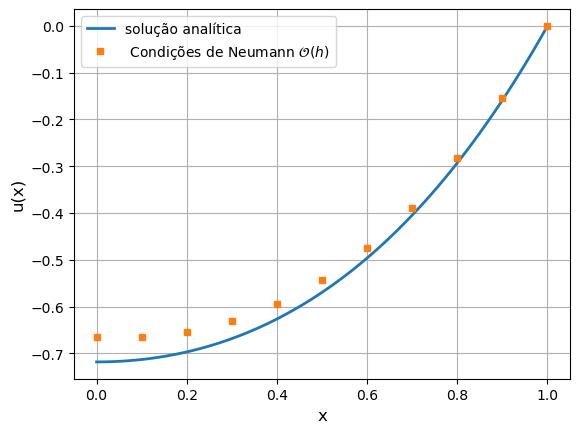

In [5]:
def poissonEqFirstCase(boundary_conditions, n, f):
    h = 1 / (n )
    k1 = np.ones(n - 1); k2 = -2 * np.ones(n); k3 = 1 * np.ones(n - 1)
    A = tridiag(k1, k2, k3)
    A[0,0] = -h
    A[0,1] = h
    F = np.zeros(n)
    F[1:] = interpolateForcing(f,n-1)
    F[0] = boundary_conditions[0]
    F[-1] -= boundary_conditions[-1]/h**2
    A = A/h**2
    x = np.linalg.solve(A,F)
    t = np.linspace(0,1, n + 1)
    # print(F)
    x = np.append(x, boundary_conditions[1])
    return t, x, A

plotSolution(poissonEqFirstCase, n, bc_neumann, "solucaoDirichlet",r" Condições de Neumann $\mathcal{O}(h)$")

- [x] Colocar corretamente condições de Dirichlet
- [x] Criar células explicativas
- [ ] Explicar valores de convergência
- [ ] Rever a divisão em funções

## Caso 2

Podemos melhorar a aproximação da condição de Neumann utilizando um método de ordem $\mathcal{O} (h^2)$, considerando um ponto adicional $U_{-1}$ fora do domínio e aplicando diferenças centradas às expressões de $u''(0) = f(x_0)$ e $u'(0) = \sigma$:
\begin{align}
u''(0) &= \dfrac{U_{1} -2 U_0 + U_{-1}}{h ^2} = f(x_0)\\
u'(0) &= \dfrac{U_1 - U_{-1}}{2 h} = \sigma
\end{align}
Através das equações acima, podemos derivar uma expressão que elimina a dependência do ponto $U_{-1}$ fora do domínio:
\begin{equation}
\dfrac{U_1 - U_{0}}{h} = \sigma + \dfrac{h}{2} f(x_0)
\end{equation}
O sistema obtido é da forma:
\begin{equation}
  \dfrac{1}{h^2} \begin{bmatrix}
        -h & h & 0 &  \\
        1 & -2 & 1 &  \\
         & 1 & -2 & 1 & \\
         & & \ddots & \ddots  & \ddots &\\
         & & & 1 & -2 & 1 & \\
         & & & & 1 & -2 \\
    \end{bmatrix}
    \begin{bmatrix}
        U_0 \\
        U_1 \\ 
        U_2 \\
        \vdots \\
        U_{n-1}\\
        U_{n}\\
    \end{bmatrix} = 
    \begin{bmatrix}
        \sigma + \frac{h}{2} f (x_0)\\
        f(x_1) \\
        f(x_2) \\
        f(x_3) \\
        \vdots \\
        f(x_{n-1}) \\
        f(x_{n}) - \beta/h^2\\
    \end{bmatrix}
\end{equation}

Como veremos adiante, este método possui ordem de convergência $\mathcal{O}(h^2)$

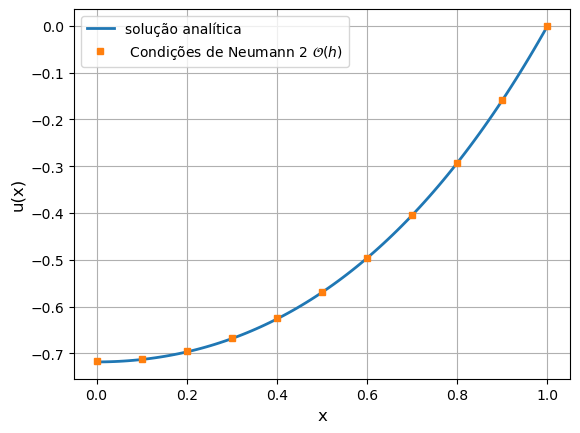

In [6]:
def poissonEqSecondCase(boundary_conditions, n, f):
    h = 1 / n 
    k1 = np.ones(n - 1); k2 = -2 * np.ones(n); k3 = 1 * np.ones(n - 1)
    A = tridiag(k1, k2, k3)
    A[0,0] = -h
    A[0,1] = h
    F = np.zeros(n)
    F[1:] = interpolateForcing(f,n-1)
    F[0] = boundary_conditions[0]+ h /2.0 * f(0)
    F[-1] -= boundary_conditions[-1]/h**2
    A = A/h**2
    x = np.linalg.solve(A,F)
    t = np.linspace(0,1, n + 1)
    # print(F)
    x = np.append(x, boundary_conditions[1])
    return t, x, A

plotSolution(poissonEqSecondCase, 10, bc_neumann, "SolucaoSegundoCaso",r" Condições de Neumann 2 $\mathcal{O}(h)$")


## Caso 3
Com os pontos $U_0$, $U_1$ e $U_2$, podemos derivar uma aproximação de ordem $\mathcal{O}(h^2)$ para a condição de contorno da seguinte forma:
\begin{equation}
\dfrac{1}{h}\left( \dfrac{3}{2} U_0 - 2 U_1 + \dfrac{1}{2}U_2 \right) = \sigma
\end{equation}
O sistema aumentado obtido é da forma:
\begin{equation}
    \dfrac{1}{h^2}\begin{bmatrix}
        \dfrac{3}{2}h  & -2 h &  \dfrac{1}{2}h &  \\
        1 & -2 & 1 &  \\
         & 1 & -2 & 1 & \\
         & & \ddots & \ddots  & \ddots &\\
         & & & 1 & -2 & 1 & \\
         & & & & 1 & -2 \\
    \end{bmatrix}
    \begin{bmatrix}
        U_0 \\
        U_1 \\ 
        U_2 \\
        \vdots \\
        U_{n-1}\\
        U_{n}\\
    \end{bmatrix} = 
    \begin{bmatrix}
        \sigma \\
        f(x_1) \\
        f(x_2) \\
        f(x_3) \\
        \vdots \\
        f(x_{n-1}) \\
        f(x_{n}) - \beta/h^2\\
    \end{bmatrix}
\end{equation}

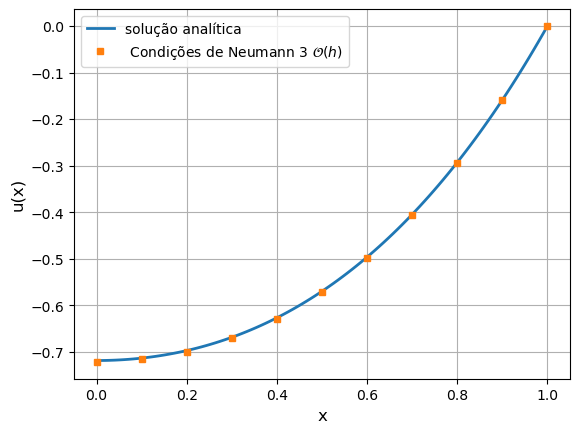

In [7]:
def poissonEqThirdCase(boundary_conditions, n, f):
    h = 1 / (n)
    k1 = np.ones(n - 1); k2 = -2 * np.ones(n); k3 = 1 * np.ones(n - 1)
    A = tridiag(k1, k2, k3)
    A[0,0] = 3.0 / 2.0 * h
    A[0,1] = - 2.0 * h
    A[0,2] =  1.0 / 2.0 * h
    F = np.zeros(n)
    F[1:] = interpolateForcing(f,n-1)
    F[0] = boundary_conditions[0]
    F[-1] -= boundary_conditions[1]/h**2
    # x = np.zeros(n)
    A = A/h**2
    x = np.linalg.solve(A,F)
    # print(h)
    t = np.linspace(0,1, n + 1,endpoint=True)
    x = np.append(x, boundary_conditions[1])
    # print(x)
    return t, x, A

plotSolution(poissonEqThirdCase, n, bc_neumann, "SolucaoTerceiroCaso",r" Condições de Neumann 3 $\mathcal{O}(h)$")

# Convergência

Calculamos agora a convergência para a norma do máximo e norma 2 para as aproximações e para os valores da matriz inversa da discretização.


## Convergência na norma do máximo

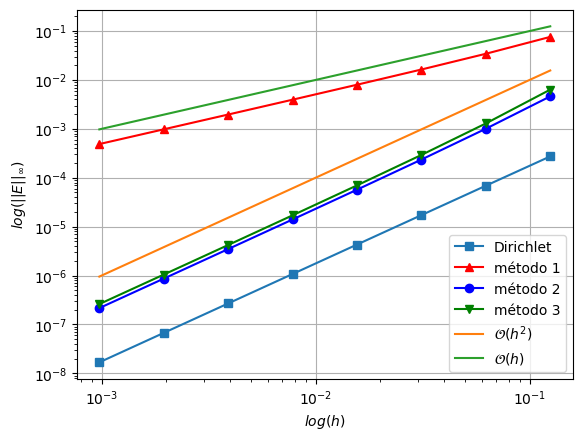

In [8]:
f = np.exp
norm = np.inf
n = 8
bc = [2 - np.exp(1),0]
hd, errord, errordInvA = convergence(poissonEqDirichlet,  bc_dirichlet, f, solution, n, norm)
h1, error1, error1InvA = convergence(poissonEqFirstCase,  bc_neumann,   f, solution, n, norm)
h2, error2, error2InvA = convergence(poissonEqSecondCase, bc_neumann,   f, solution, n, norm)
h3, error3, error3InvA = convergence(poissonEqThirdCase,  bc_neumann,   f, solution, n, norm)
plt.loglog(hd, errord, "-s", label= "Dirichlet")
plt.loglog(h1, error1, "r-^", label= "método 1")
plt.loglog(h2, error2, "b-o", label = "método 2")
plt.loglog(h3, error3, "g-v", label = "método 3")
plt.loglog(h1, h1**2, label = r"$\mathcal{O}(h^2)$")
plt.loglog(h1, h1, label= r"$\mathcal{O}(h)$")
plt.legend()
plt.xlabel(r"$log (h)$")
plt.ylabel(r"$log (||E||_{\infty})$")
plt.grid()
plt.savefig("convergenciaNormMax.png")

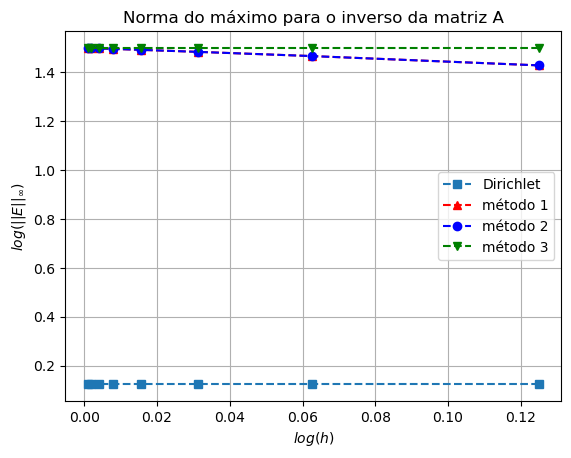

In [9]:
plt.plot(hd, errordInvA, "--s", label="Dirichlet")
plt.title("Norma do máximo para o inverso da matriz A")
plt.plot(h1, error1InvA, "r--^", label="método 1")
plt.plot(h2, error2InvA, "b--o", label="método 2")
plt.plot(h3, error3InvA, "g--v", label="método 3")
plt.legend()
plt.xlabel(r"$log(h)$")
plt.ylabel(r"$log(||E||_{\infty})$")
plt.grid()
plt.savefig("normaInfInvA.png")

Conforme o esperado para métodos que utilizam a condição de Neumann, o valor da norma do máximo da matriz inversa da discretização converge para $ \mathcal{O}(h ^{3/2})$ quando $h\to 0$, pois conforme visto no livro do LeVeque$ \mathcal{O}(h ^{3/2})$ majora a norma do máximo para o erro no caso em que a formulação é estável na norma 2 para o erro. E o valor para a aproximação utilizando condições de contorno de Dirichlet se aproxima de $1/8$. 

## Para a norma 2
Em vez de calcular a norma 2 da matriz inversa, podemos utilizar o fato que os autovalores da matriz inversa são os autovalores inversos da matriz original. Sabendo disso, é possível notar que a matriz $A^T A$, que é sempre uma matriz positiva definida, portanto, seus autovalores são sempre positivos. Sendo assim, o menor autovalor de $A^T A$ nunca se anula, e portanto, o raio espectral de $(A^{-1})^T A$ possui um limite superior que depende de $h$. Este fato é responsável pela estabilidade, num sentido mais fraco, dos métodos de aproximação do problema de Poisson que utilizam aproximações para as condições de Neumann.

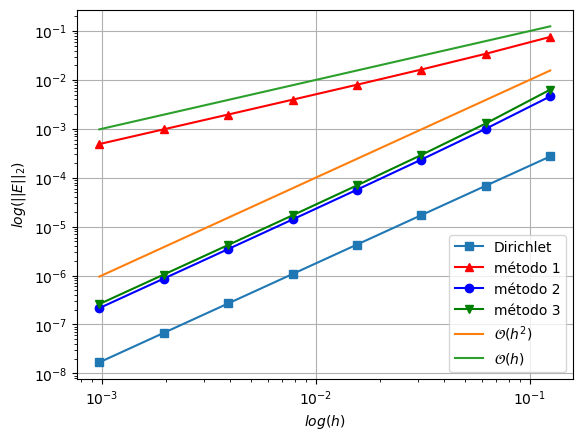

In [10]:
f = np.exp
norm = 2
n = 8
bc = [2 - np.exp(1),0]
hd, errord, errordInvA = convergence(poissonEqDirichlet,  bc_dirichlet, f, solution, n, norm)
h1, error1, error1InvA = convergence(poissonEqFirstCase,  bc_neumann,   f, solution, n, norm)
h2, error2, error2InvA = convergence(poissonEqSecondCase, bc_neumann,   f, solution, n, norm)
h3, error3, error3InvA = convergence(poissonEqThirdCase,  bc_neumann,   f, solution, n, norm)
plt.loglog(hd, errord, "-s", label= "Dirichlet")
plt.loglog(h1, error1, "r-^", label= "método 1")
plt.loglog(h2, error2, "b-o", label = "método 2")
plt.loglog(h3, error3, "g-v", label = "método 3")
plt.loglog(h1, h1**2, label = r"$\mathcal{O}(h^2)$")
plt.loglog(h1, h1, label= r"$\mathcal{O}(h)$")
plt.legend()
plt.xlabel(r"$log (h)$")
plt.ylabel(r"$log (||E||_{2})$")
plt.grid()
plt.savefig("convergencia2Norm.png")

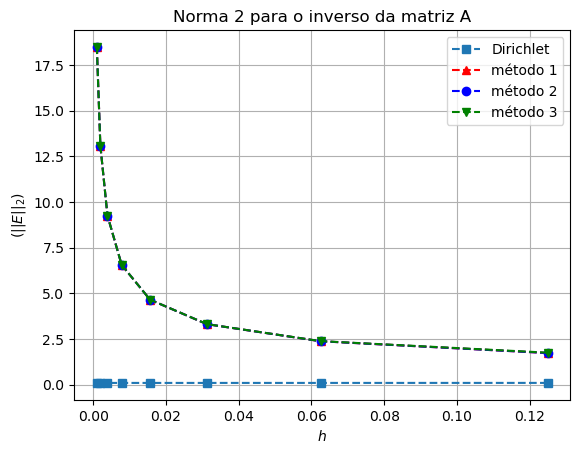

In [11]:
plt.plot(hd, errordInvA, "--s", label="Dirichlet")
plt.title("Norma 2 para o inverso da matriz A")
plt.plot(h1, error1InvA, "r--^", label="método 1")
plt.plot(h2, error2InvA, "b--o", label="método 2")
plt.plot(h3, error3InvA, "g--v", label="método 3")
plt.legend()
plt.xlabel(r"$h$")
plt.ylabel(r"$(||E||_{2})$")
plt.grid()
plt.savefig("norma2InvA.png")

Neste caso a norma 2 da matriz inversa da discretização dos métodos que utilizam condições de contorno de Neumann não é majorada estritamente, entretando possui crescimento lento conforme $h\to 0$. Esta propriedade garante a estabilidade do método para a maior parte dos $h$'s possíveis. 

Para a aproximação utilizando condições de Dirichlet, a norma 2 da matriz inversa se aproxima de $1/\pi^2$ conforme é possível verificar analiticamente utilizando expressões para o cálculo dos autovalores da matriz de discretização.

# Aproximações sobrepostas

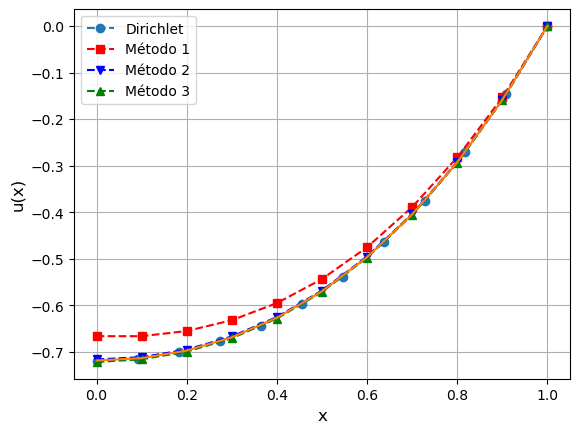

In [12]:
n = 10
bc = [0.0,0.0]
bcd = [2.0 - np.exp(1),0.0]
f = np.exp
td, xd, Ad = poissonEqDirichlet(bcd, n, f)
t1, x1, A1 = poissonEqFirstCase(bc, n, f)
t2, x2, A2 = poissonEqSecondCase(bc, n, f)
t3, x3, A3 = poissonEqThirdCase(bc, n, f)
plt.plot(td, xd, "o--", label="Dirichlet")
plt.plot(t1, x1, "r--s",label="Método 1")
plt.plot(t2, x2, "b--v",label="Método 2")
plt.plot(t3, x3, "g--^",label="Método 3")
plt.plot(t3, solution(t3), "-")
plt.legend()
plt.xlabel("x", fontsize=12)
plt.ylabel("u(x)", fontsize=12)
plt.grid()
plt.savefig("ResultadosCompostos.png")